In [20]:
import requests
import json
from IPython.display import display, Image, HTML

# Ask input from the user, clean that input to get a correct url and give feedback.
while True:
    article = input("Which article do you want to lookup on Wikipedia? ")
    article = article.strip().replace(" ","_")
    lang = input("In which language? ")
    lang = lang.strip().lower()
    
    print(f'You want to lookup an aricle about: {article}') 
    print(f"You've chosen the language: {lang}")
    
    # Change the full name of the language to the country code that Wikipedia uses.
    full_lang = ["dutch", "english", "spanish", "german", "french", "italian"]
    short_lang = ["nl","en","es","de","fr","it"]
    
    if lang in full_lang:
        index = full_lang.index(lang)
        new_lang = short_lang[index]
    else:
        new_lang = lang
    
    # Complete the full url.
    url = f'https://{new_lang}.wikipedia.org/api/rest_v1/page/summary/{article}'
    
    # Request data from the server.
    # And convert the JSON data the API returns to a Python dictionary.
    r = requests.get(url)
    data = json.loads(r.text)
    
    # Check if the page exists through checking the status_code + title.
    title = data["title"]
    if r.status_code != 200:
        print("Unfortunately, we didn't find the page you were looking for.")
        print("Please, try again:")
    elif title == "Not found.":
        print("Unfortunately, we didn't find the page you were looking for.")
        print("Please, try again:")
    else:
        print("We found the page you were looking for!")
        break
    
# Print the returned title and description (if there is one) from the API request.
title_article = data["title"].capitalize()
print(f'Title: {title_article}')
    
if "description" in data:
    description_article = data["description"].capitalize()
    print(f'Description: {description_article}')

You want to lookup an aricle about: delft
You've chosen the language: english
We found the page you were looking for!
Title: Delft
Description: City and municipality in south holland, netherlands


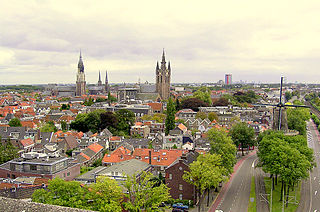

In [21]:
# Check if there’s a thumbnail, and if so, show it.
if "thumbnail" in data:
    thumbnail = data["thumbnail"]
    url_image = thumbnail["source"]
    img = Image(url_image)
    display(img)
else:
    print("There is no thumbnail available.")

In [22]:
# Check if there are coordinates, and if so, show a hyperlink to the Google Maps location.
if "coordinates" in data:
    coordinates = data["coordinates"]
    lat = coordinates["lat"]
    lon = coordinates["lon"]
    url = f'"https://www.google.com/maps/?q={lat},{lon}"'
    display(HTML(f'<a href={url}>Click here to view the location on Google maps!</a>'))
else:
    print("There are no coordinates available")
    
# Repeat steps to the related url.
rel_url = f'https://{new_lang}.wikipedia.org/api/rest_v1/page/related/{article}' 

# Repeat steps to the related url.
r_rel = requests.get(rel_url)
rel_url = f'https://{new_lang}.wikipedia.org/api/rest_v1/page/related/{article}' 

# Check the status_code of the page and check if the page exists.
# Through checking the status_code + title.
title = data["title"]
if r.status_code != 200:
    print("Unfortunately, we didn't find related pages.")
elif title == "Not found.":
    print("Unfortunately, we didn't find retaled pages.")
else:
    print("We found related pages!")
    
# Convert the JSON data the API returns to a Python dictionary.
text_rel = r_rel.text
rel_data = json.loads(text_rel)
#data_pages = rel_data["pages"]

# Create a multidimensional list with the data from the related pages.
rel_results = [
    [],
    [],
    []
]

index = 0
while index < 3:
    page_title = rel_data["pages"][index]["title"]
    rel_results[index].append(page_title)
    if "description" in rel_data["pages"][index]:
        page_description = rel_data["pages"][index]["description"]
        rel_results[index].append(page_description)
    else:
        rel_results[index].append("No description available")
    page_url = rel_data["pages"][index]["content_urls"]["desktop"]["page"]
    rel_results[index].append(page_url)
    index = index + 1
    
# Loop through the list to create a dictionary and add the dict to a list.
dict_rel = []
index = 0
while index < 3:
    relatedresults = {
        "title": rel_results[index][0], 
        "description": rel_results[index][1], 
        "url": rel_results[index][2]
    }
    dict_rel.append(relatedresults)
    index = index + 1
    
# Print the items in the dictionary.
index = 0
for item in dict_rel:
    print(f'title: {dict_rel[index]["title"]}')
    print(f'description: {dict_rel[index]["description"]}')
    print(f'url: {dict_rel[index]["url"]}\n')
    index = index + 1

We found related pages!
title: South_Holland
description: Province of the Netherlands in Netherlands
url: https://en.wikipedia.org/wiki/South_Holland

title: Antonie_van_Leeuwenhoek
description: Dutch tradesman and scientist
url: https://en.wikipedia.org/wiki/Antonie_van_Leeuwenhoek

title: Johannes_Vermeer
description: Dutch painter
url: https://en.wikipedia.org/wiki/Johannes_Vermeer

